# **BA305 Group Project: Cancer Detection from Tumors**

In [174]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import *
from sklearn import metrics
%matplotlib inline
import matplotlib.pylab as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.decomposition import PCA
import seaborn as sns

In [175]:
!git clone https://github.com/smileyfish4/BA305FINALPROJECT.git

fatal: destination path 'BA305FINALPROJECT' already exists and is not an empty directory.


# **Preprocessing**

In [176]:
# load data as a dataframe
cancer_df = pd.read_csv('BA305FINALPROJECT/cancer_data.csv')
# check if data is loaded correctly
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [177]:
# print a concise summary of the Dataframe
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [178]:
# drop Unnamed: 32 and id
cancer_df = cancer_df.drop(['Unnamed: 32', 'id'], axis=1)
# drop all standard error columns
for column in cancer_df.columns:
    if '_se' in column:
        cancer_df = cancer_df.drop(column, axis=1)
#change spaces to _
cancer_df.columns = cancer_df.columns.str.replace(' ', '_')
# Convert M/B into 1/0
cancer_df.diagnosis.replace(('M', 'B'), (1, 0), inplace=True)
#check it dropped the columns correctly
cancer_df.head()

<ipython-input-178-53d59e3cbc4a>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cancer_df.diagnosis.replace(('M', 'B'), (1, 0), inplace=True)
<ipython-input-178-53d59e3cbc4a>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cancer_df.diagnosis.replace(('M', 'B'), (1, 0), inplace=True)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Training and Splitting

In [179]:
# Define X (inputs/predictors) and y (output/outcome)
X = cancer_df.drop(columns=['diagnosis'])
y = cancer_df['diagnosis']

In [180]:
# Split data between training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [181]:
# Create scores dictionary to hold accuracy, precision, recall, and f1 scores
scores_dict = {}

## Checking Imbalance

In [182]:
malignant_count = len(cancer_df.loc[cancer_df['diagnosis'] == 1])
benign_count = len(cancer_df.loc[cancer_df['diagnosis'] == 0])

print('Number of malignant tumors in dataset: ', malignant_count)
print('Number of benign tumors in dataset: ', benign_count)

r1 = round(malignant_count / len(cancer_df) * 100, 2)
r2 = round(benign_count / len(cancer_df) * 100, 2)
print('Malignant vs. Benign: ', r1, '%',  ':', r2, '%' )

Number of malignant tumors in dataset:  212
Number of benign tumors in dataset:  357
Malignant vs. Benign:  37.26 % : 62.74 %


## PCA

In [183]:
#Standardize the data
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Correlation plot before PCA

In [184]:
# correlation table for the quantitative variables
corr_mat = cancer_df.corr()
corr_mat

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave_points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


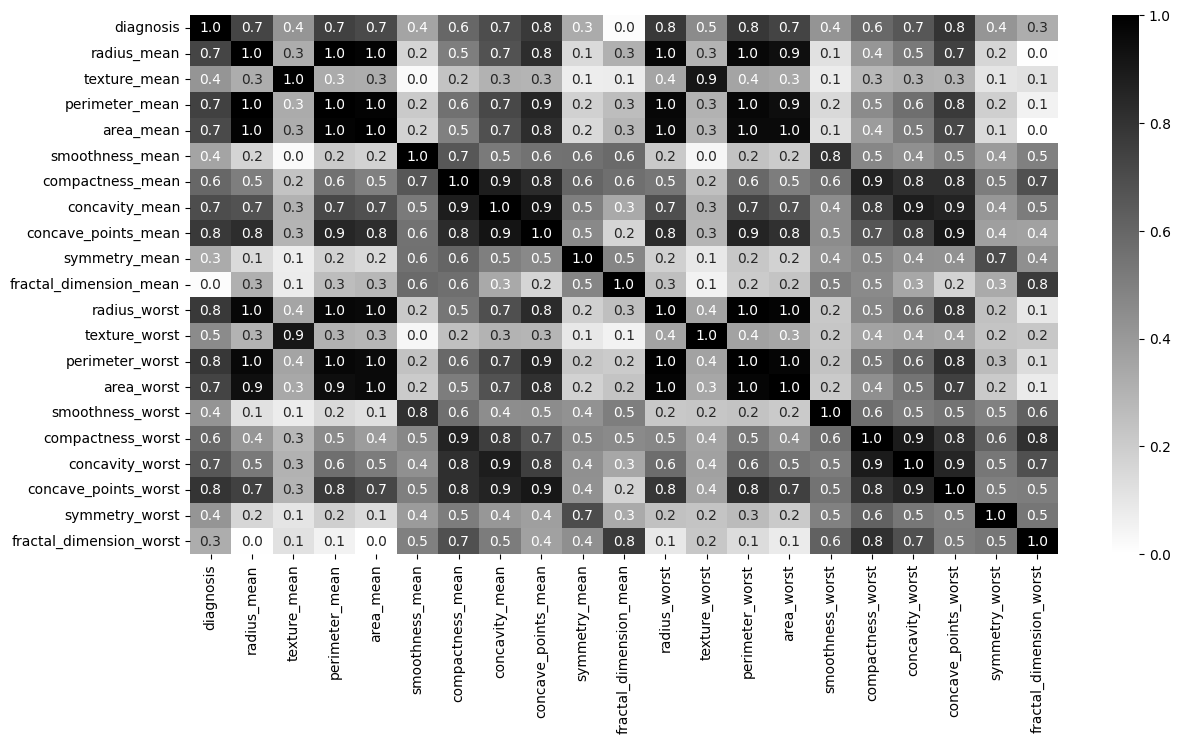

In [185]:
plt.figure(figsize=(14,7))
sns.heatmap(np.absolute(corr_mat), annot=True, fmt=".1f", vmin=0, vmax=1, cmap="gray_r");

In [186]:
scaled_array = preprocessing.scale(cancer_df)
print(scaled_array)

[[ 1.29767572  1.09706398 -2.07333501 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.29767572  1.82982061 -0.35363241 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.29767572  1.57988811  0.45618695 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 1.29767572  0.70228425  2.0455738  ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.29767572  1.83834103  2.33645719 ...  2.28998549  1.91908301
   2.21963528]
 [-0.77060855 -1.80840125  1.22179204 ... -1.74506282 -0.04813821
  -0.75120669]]


In [187]:
scaled_df = pd.DataFrame(scaled_array)
print(scaled_df)

           0         1         2         3         4         5         6   \
0    1.297676  1.097064 -2.073335  1.269934  0.984375  1.568466  3.283515   
1    1.297676  1.829821 -0.353632  1.685955  1.908708 -0.826962 -0.487072   
2    1.297676  1.579888  0.456187  1.566503  1.558884  0.942210  1.052926   
3    1.297676 -0.768909  0.253732 -0.592687 -0.764464  3.283553  3.402909   
4    1.297676  1.750297 -1.151816  1.776573  1.826229  0.280372  0.539340   
..        ...       ...       ...       ...       ...       ...       ...   
564  1.297676  2.110995  0.721473  2.060786  2.343856  1.041842  0.219060   
565  1.297676  1.704854  2.085134  1.615931  1.723842  0.102458 -0.017833   
566  1.297676  0.702284  2.045574  0.672676  0.577953 -0.840484 -0.038680   
567  1.297676  1.838341  2.336457  1.982524  1.735218  1.525767  3.272144   
568 -0.770609 -1.808401  1.221792 -1.814389 -1.347789 -3.112085 -1.150752   

           7         8         9   ...        11        12        13  \
0  

In [188]:
pca = PCA(n_components=21)
pca.fit(scaled_df)

pcaSummary_df = pd.DataFrame({
            'Proportion of variance': pca.explained_variance_ratio_,
            'Cumulative proportion': np.cumsum(pca.explained_variance_ratio_)
            })
pcaSummary_df.transpose().round(3)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
Proportion of variance,0.542,0.207,0.081,0.042,0.040,0.030,0.014,0.012,0.007,0.007,...,0.004,0.003,0.003,0.002,0.001,0.001,0.0,0.0,0.0,0.0
Cumulative proportion,0.542,0.748,0.830,0.872,0.912,0.942,0.955,0.967,0.975,0.981,...,0.990,0.993,0.996,0.998,0.999,0.999,1.0,1.0,1.0,1.0


This shows us that our first column, alone, explains 54.2% of the variance in the data alone.

### Correlation plot after PCA

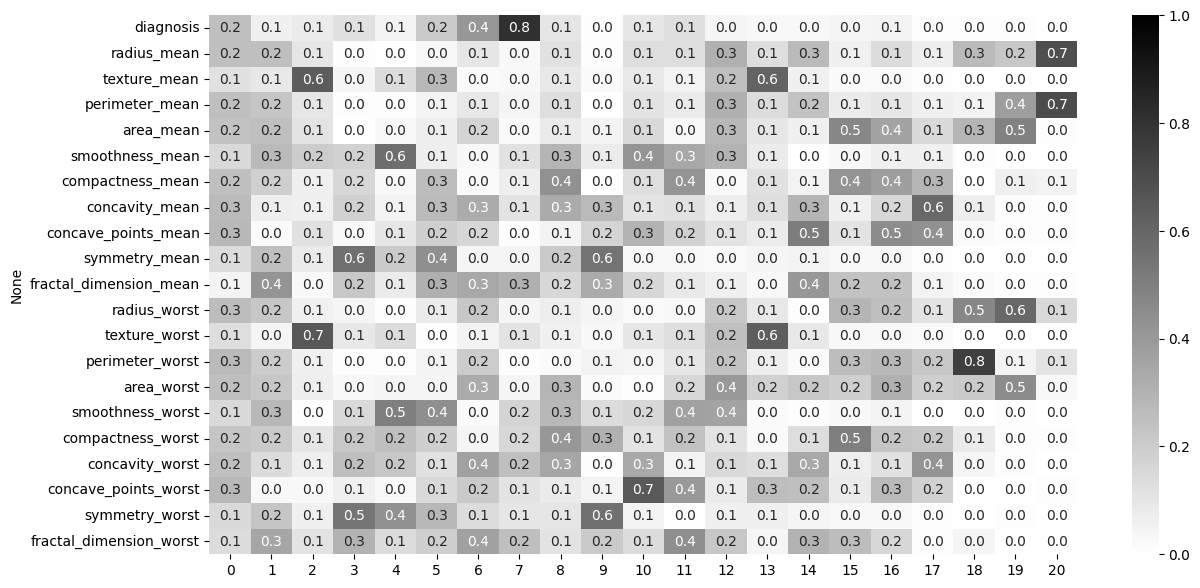

In [189]:
var = list(cancer_df.columns)
pca_df = pd.DataFrame(pca.components_.transpose(), index=[var]).round(2)
plt.figure(figsize=(14,7))
sns.heatmap(np.absolute(pca_df), annot=True, fmt=".1f", vmin=0, vmax=1, cmap="gray_r");

### Choosing number of components

In [190]:
eig=pca.explained_variance_.round(2)
print(eig)

[1.139e+01 4.350e+00 1.710e+00 8.900e-01 8.400e-01 6.300e-01 2.900e-01
 2.500e-01 1.500e-01 1.400e-01 1.000e-01 8.000e-02 7.000e-02 6.000e-02
 4.000e-02 2.000e-02 1.000e-02 1.000e-02 0.000e+00 0.000e+00 0.000e+00]


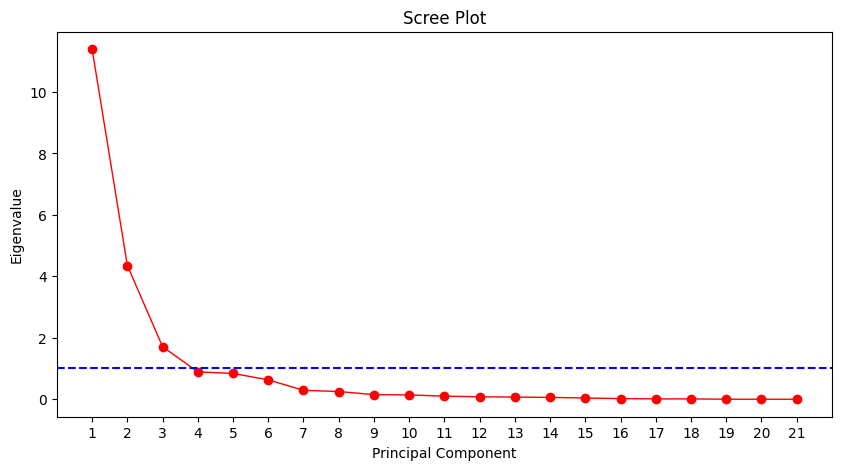

In [191]:
# scree plot of eigenvalues
# define the x values, which is a simple array between 1 and 12
xvals = np.arange(1,22,step=1);
#figure size
plt.figure(figsize=(10,5))
#plot in red color
plt.plot(xvals, eig, 'ro-', linewidth=1)
#set ticks to every unit
plt.xticks(xvals)

#add labels...
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

#add a horizontal line in blue
plt.axhline(y=1, color='b', linestyle='--')

The latent root criterion suggests keeping the first 3 components.

**Conclusion:** We have taken a 20-dimensional dataset and reduced it down to 3 core components.

In [192]:
# we are going to create a new dataframe to store the output
pcaSummary_df = pd.DataFrame({
            '% of variance explained': pca.explained_variance_ratio_,
            'Cumulative % explained': np.cumsum(pca.explained_variance_ratio_)
             })
# round(3) function rounds to 3 decimals
pcaSummary_df.round(3)

,% of variance explained,Cumulative % explained
0,0.542,0.542
1,0.207,0.748
2,0.081,0.830
3,0.042,0.872
4,0.040,0.912
5,0.030,0.942
6,0.014,0.955
7,0.012,0.967
8,0.007,0.975
9,0.007,0.981


Based on this table, we would be inclined to take 5 componenets to get closer to including all of the data.

### Correlation to original features

In [193]:
pca_df = pd.DataFrame(pca.components_).round(2).transpose()
pca_df.index = [list(cancer_df.columns)]
pca_df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
diagnosis,0.25,-0.06,0.08,0.12,0.05,0.21,0.41,0.81,0.10,-0.01,...,-0.13,0.04,0.03,-0.03,0.04,-0.05,-0.01,0.01,-0.01,-0.00
radius_mean,0.25,-0.25,-0.10,0.01,-0.00,-0.03,-0.10,-0.03,0.12,-0.01,...,0.13,-0.31,0.13,-0.27,-0.06,0.14,0.07,-0.27,-0.22,-0.69
texture_mean,0.12,-0.09,0.64,0.04,0.14,-0.28,-0.02,-0.03,0.09,0.02,...,-0.05,-0.25,-0.61,0.06,-0.02,0.02,0.01,0.00,-0.00,0.00
perimeter_mean,0.25,-0.23,-0.10,-0.01,-0.01,-0.05,-0.09,-0.04,0.13,-0.00,...,0.08,-0.31,0.14,-0.24,-0.08,0.10,0.06,-0.05,-0.38,0.70
area_mean,0.24,-0.25,-0.11,0.00,0.03,-0.07,-0.17,-0.02,-0.08,0.05,...,0.03,-0.28,0.10,-0.06,0.47,-0.36,-0.15,0.29,0.49,0.01
smoothness_mean,0.15,0.27,-0.20,0.18,0.57,-0.07,0.03,-0.12,0.29,0.08,...,0.34,0.30,-0.08,0.00,0.03,-0.06,0.06,0.01,0.00,0.00
compactness_mean,0.25,0.19,-0.06,-0.16,-0.03,-0.26,-0.02,-0.07,0.43,0.00,...,-0.42,0.02,0.12,-0.05,-0.42,-0.38,-0.29,0.00,0.06,-0.05
concavity_mean,0.27,0.07,-0.06,-0.18,-0.05,-0.27,0.33,-0.11,-0.33,0.27,...,-0.12,-0.07,0.13,0.29,-0.06,-0.16,0.59,-0.07,-0.01,-0.01
concave_points_mean,0.28,-0.02,-0.12,-0.03,0.10,-0.19,0.16,-0.01,0.05,0.17,...,0.18,-0.11,0.08,0.51,0.11,0.45,-0.43,0.02,-0.01,-0.01
symmetry_mean,0.14,0.25,-0.08,0.56,-0.21,-0.44,0.04,0.04,-0.21,-0.55,...,0.03,-0.02,0.04,-0.05,0.03,0.03,0.01,-0.00,0.00,0.00


The principal components are increasingly difficult to interpret as they involve small, mixed contributions from many original features, especially in later components. This correlation plot shows us that we lose a majority of our interpretability.

Below, we decided to take 3 components and follow the scree test rather than 5.

In [194]:
pca2 = PCA(n_components=5)
principalComponents = pca2.fit_transform(scaled_df)

# make the output more readable by creating a new dataframe
principalDF = pd.DataFrame(
        principalComponents.round(3),
        columns = ['F1','F2','F3','F4','F5']
        )

principalDF

,F1,F2,F3,F4,F5
0,7.924,3.300,-3.418,-0.036,-1.694
1,2.893,-3.309,-1.170,0.168,-0.418
2,5.413,-0.728,-0.838,0.694,-0.164
3,6.651,10.287,0.388,1.181,-1.351
4,3.372,-2.268,-2.834,-0.555,0.393
...,...,...,...,...,...
564,5.112,-3.379,-1.143,-0.534,1.751
565,3.550,-3.673,1.662,0.411,0.894
566,1.325,-2.399,2.233,-0.818,0.153
567,10.025,2.125,1.765,-0.517,-0.854


### Training and Splitting for PCA

In [195]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(principalComponents, y, test_size=0.3, random_state=42)

# Baseline Model: Majority Rule

In [196]:
base_train = y_train.value_counts().idxmax()
print("Majority Class:", base_train)

Majority Class: 0


In [197]:
base_test = y_test.value_counts()
base_acc = base_test[base_train] / (base_test[0] + base_test[1])

print('Baseline model accuracy: ', (base_acc))

Baseline model accuracy:  0.631578947368421


# **Decision Tree**

## Full Tree

In [198]:
# Build "Full Tree"
full_clf = DecisionTreeClassifier(random_state=0)
full_clf.fit(X_train_pca, y_train_pca)

DecisionTreeClassifier(random_state=0)

In [199]:
#print basic structure of full tree
print('Number of classes: ', full_clf.tree_.n_classes)
print('Number of features: ', full_clf.tree_.n_features)
print('Number of nodes: ', full_clf.tree_.node_count)
print('Number of leaves: ', full_clf.tree_.n_leaves)
print('Number of maximum depth: ', full_clf.tree_.max_depth)

Number of classes:  [2]
Number of features:  5
Number of nodes:  31
Number of leaves:  16
Number of maximum depth:  7


In [200]:
# Text representation of full tree
text_representation = tree.export_text(full_clf)
print(text_representation)

|--- feature_0 <= 0.59
|   |--- feature_0 <= -0.35
|   |   |--- feature_1 <= -2.66
|   |   |   |--- feature_4 <= -0.59
|   |   |   |   |--- class: 0
|   |   |   |--- feature_4 >  -0.59
|   |   |   |   |--- feature_3 <= -0.76
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_3 >  -0.76
|   |   |   |   |   |--- class: 1
|   |   |--- feature_1 >  -2.66
|   |   |   |--- feature_2 <= 1.32
|   |   |   |   |--- feature_4 <= 1.11
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_4 >  1.11
|   |   |   |   |   |--- feature_4 <= 1.12
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_4 >  1.12
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  1.32
|   |   |   |   |--- feature_2 <= 1.37
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  1.37
|   |   |   |   |   |--- feature_0 <= -1.18
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_0 >  -1.18
|   |   |   |   |   |   |--- feature_3 <= -0.21
|   |

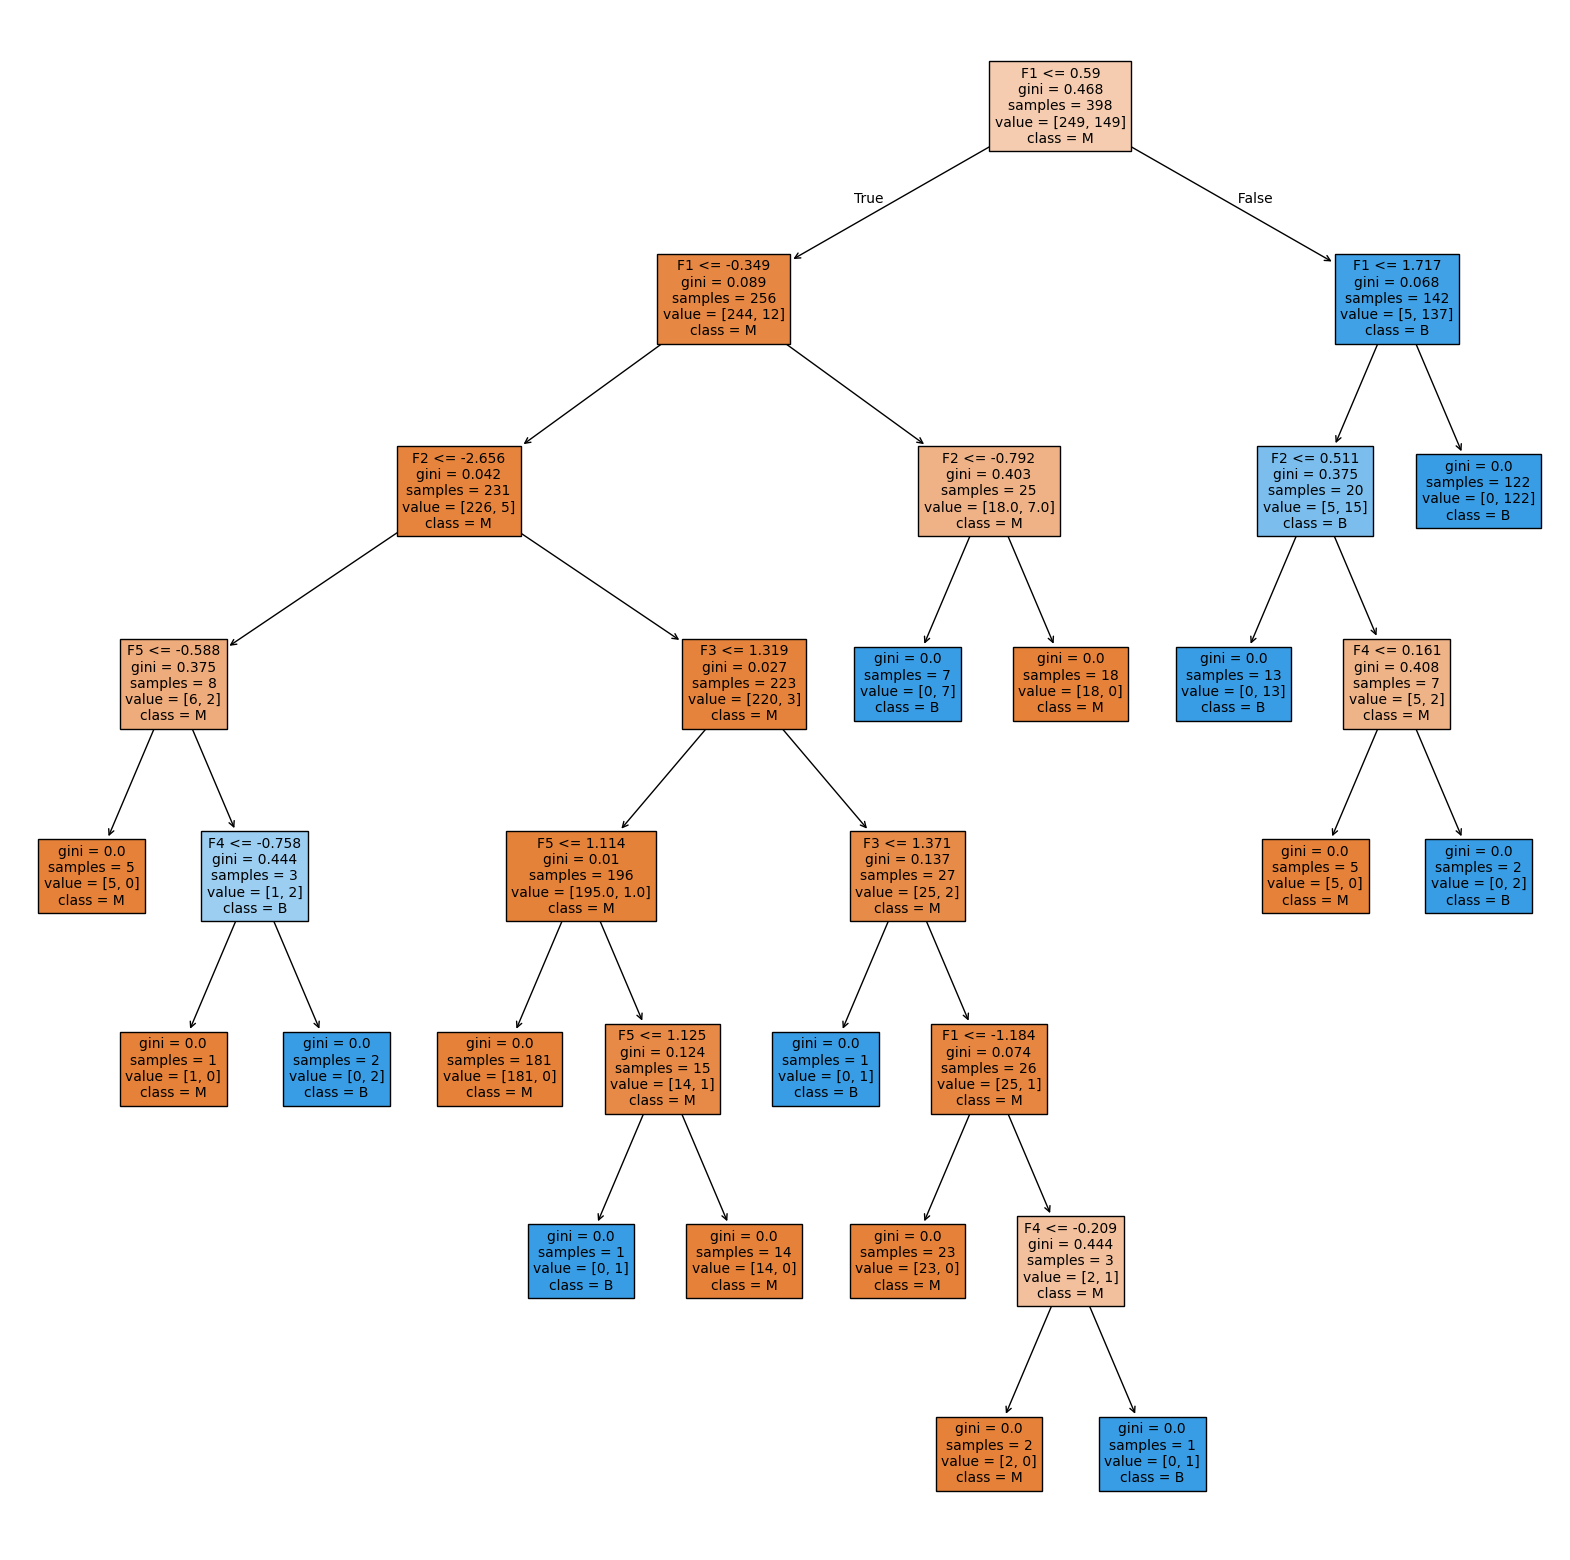

In [201]:
# Visualize the full tree via "plot_tree" function

# Re-size the figure via matplotlib
plt.figure(figsize=(20,20))

# call plot_tree function to plot the tree
cnames = ['M', 'B']
tree.plot_tree(full_clf, feature_names = ['F1','F2','F3','F4','F5'], class_names = cnames, fontsize = 10, filled = True);

In [202]:
# Feed input data to model to predict y output for test data
y_pred_FT = full_clf.predict(X_test_pca)

In [203]:
# Accuracy of full tree on test sets
test_score = accuracy_score(y_test_pca, y_pred_FT)

print('Accuracy score of full tree on testing data =', round(test_score*100,1), '%')

#append accuracy score, percision, recall, and F1 score to dictionary
accuracyFT = test_score
precisionFT = precision_score(y_test_pca, y_pred_FT)
recallFT = recall_score(y_test_pca, y_pred_FT)
f1FT = f1_score(y_test_pca, y_pred_FT)
scores_dict['Full Tree'] = [accuracyFT, precisionFT, recallFT, f1FT]

# calculate probabilities

Accuracy score of full tree on testing data = 97.1 %


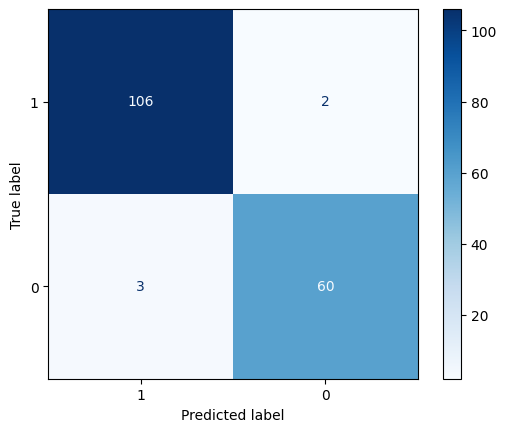

In [204]:
# Confusion matrix of full tree on test set
cm = confusion_matrix(y_test_pca, y_pred_FT)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cancer_df.diagnosis.unique())
disp.plot(cmap=plt.cm.Blues)
plt.show()

### Feature Importance

In [205]:
# Extract importance values for each feature (column of X)
importances1 = full_clf.feature_importances_

# create a dataframe to store the values and their labels
cancer_decFT_features_df = pd.DataFrame({'feature': ['F1','F2','F3','F4','F5'], 'importance': importances1})

# sort dataframe by descending order, showing the most important feature top
cancer_decFT_features_df  = cancer_decFT_features_df.sort_values('importance', ascending = False)
cancer_decFT_features_df.head()

,feature,importance
0,F1,0.856392
1,F2,0.083605
3,F4,0.029628
4,F5,0.019612
2,F3,0.010762


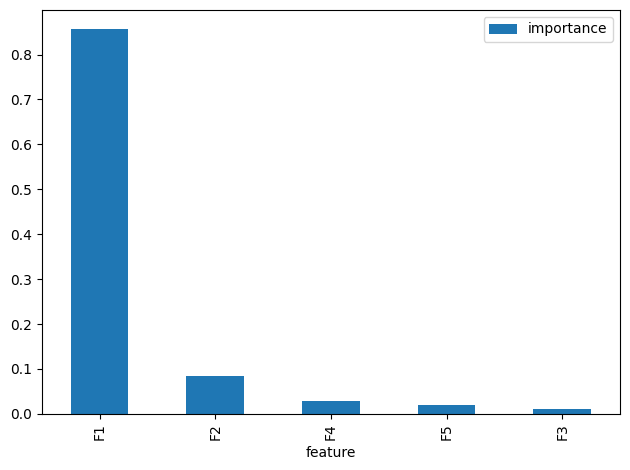

In [206]:
# plot the importance of each feature
ax1 = cancer_decFT_features_df.plot(kind='bar', x='feature')

plt.tight_layout()
plt.show()

## Pruned Decision Tree

In [207]:
alphas = full_clf.cost_complexity_pruning_path(X_train_pca, y_train_pca).ccp_alphas
alphas

array([0.        , 0.00241593, 0.00249974, 0.00252062, 0.0032364 ,
       0.00717875, 0.00853109, 0.01644655, 0.38671934])

In [208]:
# Create a decision tree for each possible value of alpha, and store the
# trees in an array called 'clfs'

clfs = [] # this creates an empty array (placeholder)

# now loop through all the possible alphas
for i in alphas:
    my_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=i)
    my_clf.fit(X_train_pca, y_train_pca)
    clfs.append(my_clf) #this line adds to the fitted tree to the clfs[] array

# Display final array of Trees:
clfs

[DecisionTreeClassifier(ccp_alpha=np.float64(0.0), random_state=0),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.002415925782759955),
                        random_state=0),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.0024997436160393827),
                        random_state=0),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.0025206151630232376),
                        random_state=0),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.0032364047507026906),
                        random_state=0),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.007178750897343863),
                        random_state=0),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.008531086013568856),
                        random_state=0),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.016446545498053036),
                        random_state=0),
 DecisionTreeClassifier(ccp_alpha=np.float64(0.3867193432304135), random_state=0)]

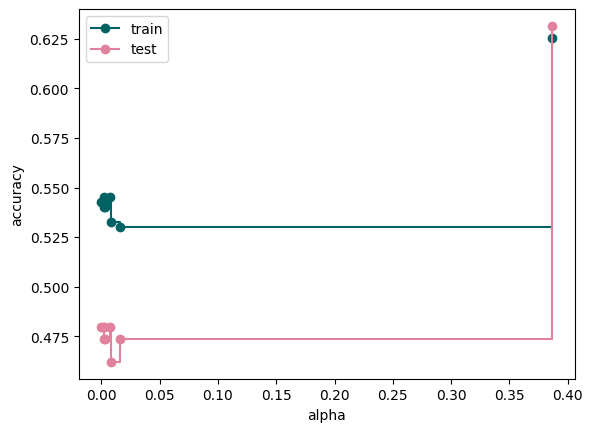

In [209]:
# Plot the tree predictive accuracy as a function of alpha
train_scores_PT = [accuracy_score(y_train, x.predict(X_train_pca)) for x in clfs]
test_scores_PT = [accuracy_score(y_test, x.predict(X_test_pca)) for x in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.plot(alphas, train_scores_PT, marker="o", label="train", drawstyle="steps-post", color = '#036264')
ax.plot(alphas, test_scores_PT, marker="o", label="test", drawstyle="steps-post", color = '#e0819d')
ax.legend()
plt.show()

It is hard to evaluate based on the gaph above due to the outlier alpha of  0.396. Since it gives a low accuracy, which we don't want, we removed the outlier to find a better alpha score to prune our data with.

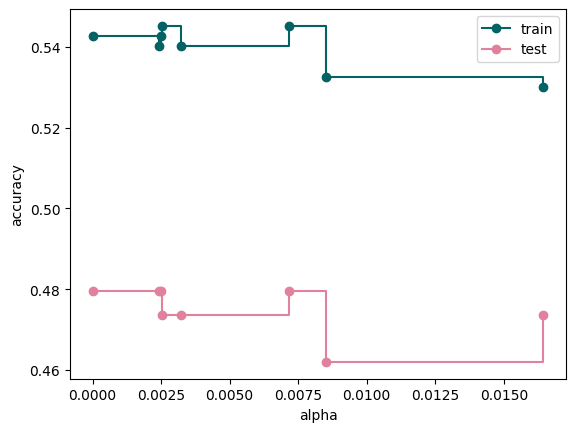

In [210]:
# Remove outlier from threshold
train_scores_threshold = train_scores_PT[:-1]
test_scores_threshold = test_scores_PT[:-1]
alphas_threshold = alphas[:-1]


fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.plot(alphas_threshold, train_scores_threshold, marker="o", label="train", drawstyle="steps-post", color = '#036264')
ax.plot(alphas_threshold, test_scores_threshold, marker="o", label="test", drawstyle="steps-post", color = '#e0819d')
ax.legend()
plt.show()

In [235]:
# Set threshold to keep top 80% of test accuracy
threshold = max(test_scores_PT) * 0.8
print(threshold)
filtered_indices = [i for i in range(len(test_scores_PT)) if test_scores_PT[i] >= threshold]

# Among those, find the one with the smallest gap between testing and training data
best_index = min(filtered_indices, key=lambda i: abs(train_scores_PT[i] - test_scores_PT[i]))
best_alpha = alphas[best_index]

print(f"Best alpha (top accuracy + smallest gap): {best_alpha}")
print('Accuracy score of pruned tree on testing data =', round(test_scores_PT[best_index]*100,1), '%')

0.5052631578947369
Best alpha (top accuracy + smallest gap): 0.3867193432304135
Accuracy score of pruned tree on testing data = 63.2 %


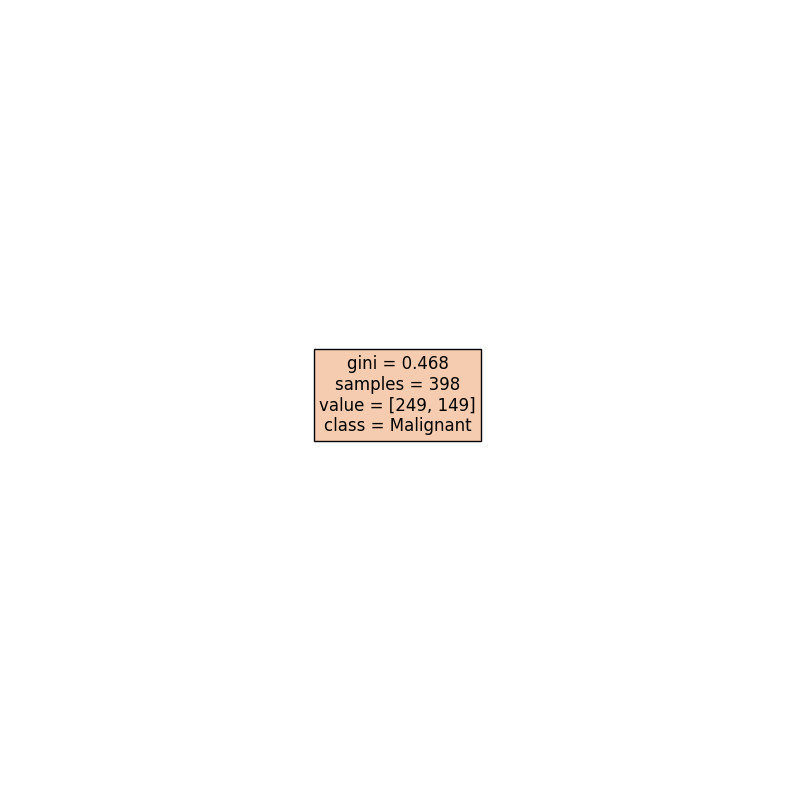

In [212]:
pruned_clf = DecisionTreeClassifier(random_state=0, ccp_alpha=best_alpha)
pruned_clf.fit(X_train_pca, y_train_pca)

fig = plt.figure(figsize = (10,10))

y_pred_PT = pruned_clf.predict(X_test_pca)

cnames = ['Malignant','Benign']
tree.plot_tree(pruned_clf, fontsize = 12, feature_names = ['F1','F2','F3','F4','F5'], class_names = cnames, filled = True);

Using PCA-transformed features, the pruned decision tree finds no split that improves classification enough to be worth making, so it stays as a root node.

In [213]:
#append scores to dictionary
accuracyPT = test_scores_PT[best_index]
precisionPT = precision_score(y_test_pca, y_pred_PT)
recallPT = recall_score(y_test_pca, y_pred_PT)
f1PT = f1_score(y_test_pca, y_pred_PT)
scores_dict['Pruned Tree'] = [accuracyPT, precisionPT, recallPT, f1PT]

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


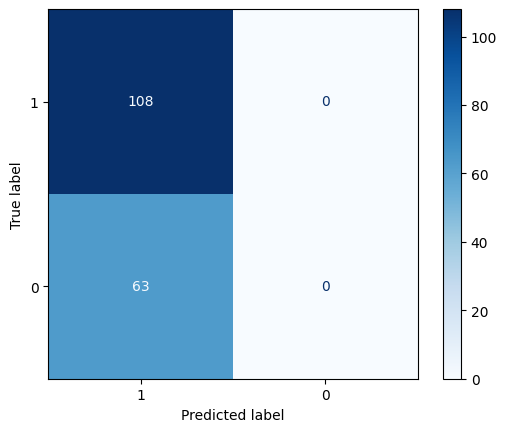

In [214]:
# Confusion matrix of pruned tree
cm = confusion_matrix(y_test_pca, y_pred_PT)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cancer_df.diagnosis.unique())
disp.plot(cmap=plt.cm.Blues)
plt.show()

### Feature Importance

In [215]:
# Extract importance values for each feature (column of X)
importances2 = pruned_clf.feature_importances_

# create a dataframe to store the values and their labels
cancer_decPT_features_df = pd.DataFrame({'feature': ['F1','F2','F3','F4','F5'], 'importance': importances2})

# sort dataframe by descending order, showing the most important feature top
cancer_decPT_features_df  = cancer_decPT_features_df.sort_values('importance', ascending = False)
cancer_decPT_features_df.head()

,feature,importance
0,F1,0.0
1,F2,0.0
2,F3,0.0
3,F4,0.0
4,F5,0.0


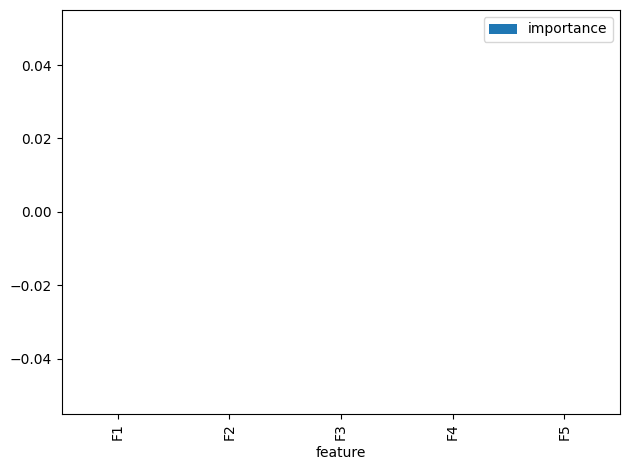

In [216]:
# plot the importance of each feature
ax2 = cancer_decPT_features_df.plot(kind='bar', x='feature')

plt.tight_layout()
plt.show()

# **Random Forests**

In [217]:
# Run random forest classifier 10,000 times
rf = RandomForestClassifier(
    n_estimators=10000,
    random_state=0,
    criterion='gini')
rf.fit(X_train_pca, y_train_pca)

RandomForestClassifier(n_estimators=10000, random_state=0)

In [218]:
# Print the accuracy score of the best found tree in the forest
y_pred_rf = rf.predict(X_test_pca)
print('Accuracy score of random forests on testing data =', round(accuracy_score(y_test_pca, y_pred_rf)*100,1), '%')

#append scores to dictionary
accuracyRF = accuracy_score(y_test_pca, y_pred_rf)
precisionRF = precision_score(y_test_pca, y_pred_rf)
recallRF = recall_score(y_test_pca, y_pred_rf)
f1RF = f1_score(y_test_pca, y_pred_rf)
scores_dict['Random Forest'] = [accuracyRF, precisionRF, recallRF, f1RF]

Accuracy score of random forests on testing data = 98.2 %


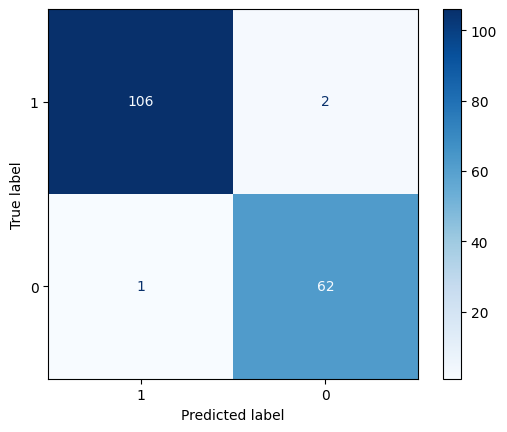

In [219]:
# Confusion matrix of random forest
cm = confusion_matrix(y_test_pca, y_pred_rf)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cancer_df.diagnosis.unique())
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Feature Importance

In [220]:
# Extract importance values for each feature (column of X)
importances = rf.feature_importances_

# create a dataframe to store the values and their labels
cancer_rf_features_df = pd.DataFrame({'feature': ['F1','F2','F3','F4','F5'], 'importance': importances})

# sort dataframe by descending order, showing the most important feature top
cancer_rf_features_df  = cancer_rf_features_df.sort_values('importance', ascending = False)
cancer_rf_features_df.head()

,feature,importance
0,F1,0.778984
1,F2,0.096512
3,F4,0.044427
2,F3,0.042816
4,F5,0.037261


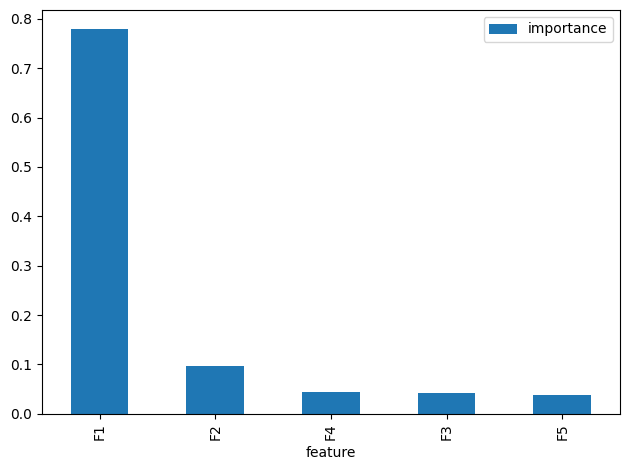

In [221]:
# plot the importance of each feature
ax = cancer_rf_features_df.plot(kind='bar', x='feature')

plt.tight_layout()
plt.show()

The feature importance remained the same for the random forest as well. The feature with the most decision making power is concave_mean_points (the mean number of concaved points on the tumor).

# K-Nearest Neighbours

In [222]:
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(X_train_pca, y_train_pca)
y_pred_knn = knn_1.predict(X_test_pca)

print('Accuracy score of KNN on testing data before checking best k =', round(accuracy_score(y_test_pca, y_pred_knn)*100,1), '%')

Accuracy score of KNN on testing data before checking best k = 97.7 %


In [223]:
best_k = []

for k in range(1, 101):
    knn = KNeighborsClassifier(n_neighbors=k)

    best_k.append({
        'k': k,
        'accuracy': cross_val_score(knn, X_train_pca, y_train_pca, cv=5, scoring='accuracy').mean()
    })

kresults_df = pd.DataFrame(best_k)
kresults_df

,k,accuracy
0,1,0.962342
1,2,0.967342
2,3,0.967373
3,4,0.969873
4,5,0.969873
...,...,...
95,96,0.947184
96,97,0.947184
97,98,0.947184
98,99,0.947184


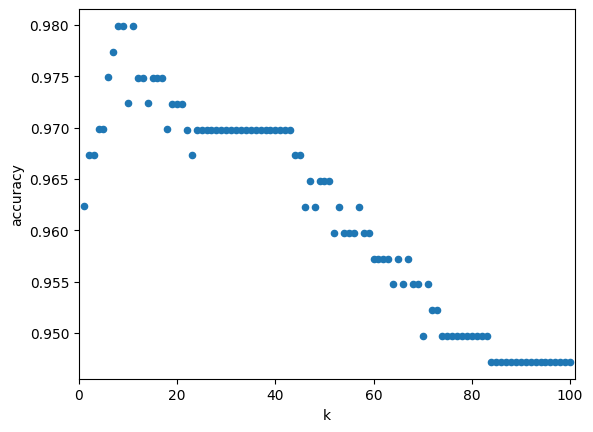

In [224]:
 #plot accuracy vs. k
kresults_df.plot.scatter(x='k', y='accuracy', xlim=[0, 101]);

In [225]:
# Find the max value and associated index
max_val = kresults_df['accuracy'].max()
max_val_idx = kresults_df['accuracy'].idxmax()

print("Max value =", max_val, '|', " Best k =", kresults_df['k'][max_val_idx])

Max value = 0.9799050632911392 |  Best k = 8


Accuracy score of KNN on testing data with best k =: 97.7 %


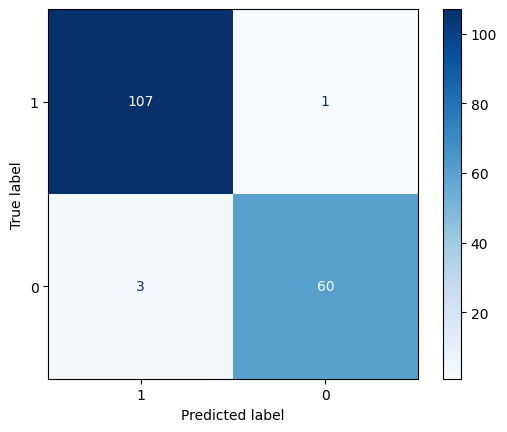

In [226]:
# Confusion matrix and accuracy for the validation data, using best k = 6
knn_best = KNeighborsClassifier(n_neighbors=6)
knn_best.fit(X_train_pca, y_train_pca)

y_pred_knn_best = knn_best.predict(X_test_pca)
knn_cm = confusion_matrix(y_test_pca, y_pred_knn_best)
print('Accuracy score of KNN on testing data with best k =:', round(accuracy_score(y_test_pca, y_pred_knn_best)*100,1),'%')

#append scores to dictionary
accuracyKNN = accuracy_score(y_test_pca, y_pred_knn_best)
precisionKNN = precision_score(y_test_pca, y_pred_knn_best)
recallKNN = recall_score(y_test_pca, y_pred_knn_best)
f1KNN = f1_score(y_test_pca, y_pred_knn_best)
scores_dict['K-Nearest Neighbours'] = [accuracyKNN, precisionKNN, recallKNN, f1KNN]

# Plot the confusion matrix
kdisp = ConfusionMatrixDisplay(confusion_matrix=knn_cm, display_labels=cancer_df.diagnosis.unique())
kdisp.plot(cmap=plt.cm.Blues)
plt.show()

# Naive Bayes Classifier

Due to use using continuous numerical features, we felt Gaussian Naive Bayes would do a better job.

Accuracy score of Gaussian Naive Bayes Classifier on testing data = 97.7 %


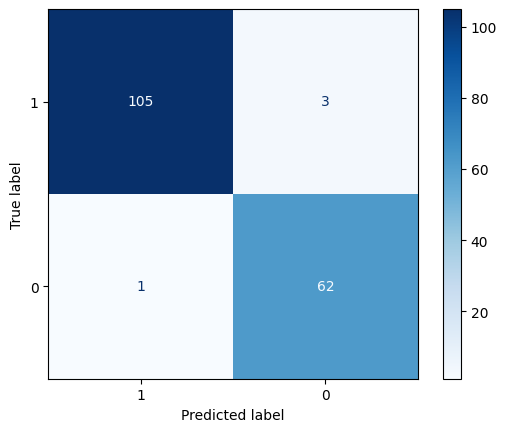

In [227]:
# Training Gaussian Naive Bayes on standardized data
gnb = GaussianNB()
gnb.fit(X_train_pca, y_train_pca)

# Prediction
y_pred_gnb = gnb.predict(X_test_pca)
gnb_cm = confusion_matrix(y_test_pca, y_pred_gnb)

# Evaluating performance
print('Accuracy score of Gaussian Naive Bayes Classifier on testing data =', round(accuracy_score(y_test_pca, y_pred_gnb)*100,1), '%')

#append scores to dictionary
accuracyGNB = accuracy_score(y_test_pca, y_pred_gnb)
precisionGNB = precision_score(y_test_pca, y_pred_gnb)
recallGNB = recall_score(y_test_pca, y_pred_gnb)
f1GNB = f1_score(y_test_pca, y_pred_gnb)
scores_dict['Gaussian Naive Bayes'] = [accuracyGNB, precisionGNB, recallGNB, f1GNB]

# Plot the confusion matrix
gnbdisp = ConfusionMatrixDisplay(confusion_matrix=gnb_cm, display_labels=cancer_df.diagnosis.unique())
gnbdisp.plot(cmap=plt.cm.Blues)
plt.show()

# Logistic Regression

Accuracy score of Logistic Regression on testing data = 99.4 %


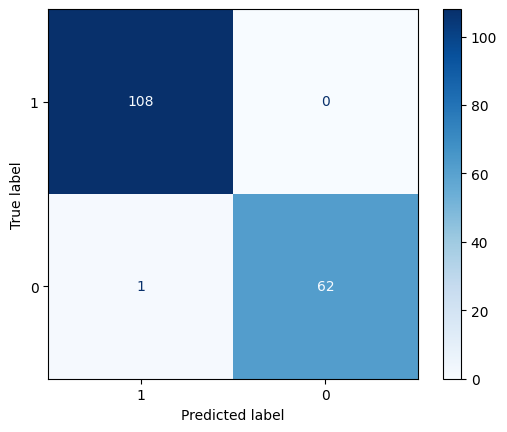

In [228]:
# Logisitc Regression
lr = LogisticRegression(penalty=None, solver='lbfgs')
lr.fit(X_train_pca, y_train_pca)

# Predictions
y_pred_lr = lr.predict(X_test_pca)
y_log_proba = lr.predict_proba(X_test_pca)
lr_cm = confusion_matrix(y_test_pca, y_pred_lr)

# Evaluating performance
print('Accuracy score of Logistic Regression on testing data =', round(accuracy_score(y_test_pca, y_pred_lr)*100,1), '%')

# append scores to dictionary
accuracyLR = accuracy_score(y_test_pca, y_pred_lr)
precisionLR = precision_score(y_test_pca, y_pred_lr, average = 'macro')
recallLR = recall_score(y_test_pca, y_pred_lr, average = 'macro')
f1LR = f1_score(y_test_pca, y_pred_lr, average = 'macro')
scores_dict['Logisic Regression'] = [accuracyLR, precisionLR, recallLR, f1LR]

# Plot the confusion matrix
lrdisp = ConfusionMatrixDisplay(confusion_matrix=lr_cm, display_labels=cancer_df.diagnosis.unique())
lrdisp.plot(cmap=plt.cm.Blues)
plt.show()

In [229]:
print(classification_report(y_test_pca, y_pred_lr))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       108
           1       1.00      0.98      0.99        63

    accuracy                           0.99       171
   macro avg       1.00      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



# Model Analysis

So far logistic regression seems the best

## PR and AUC

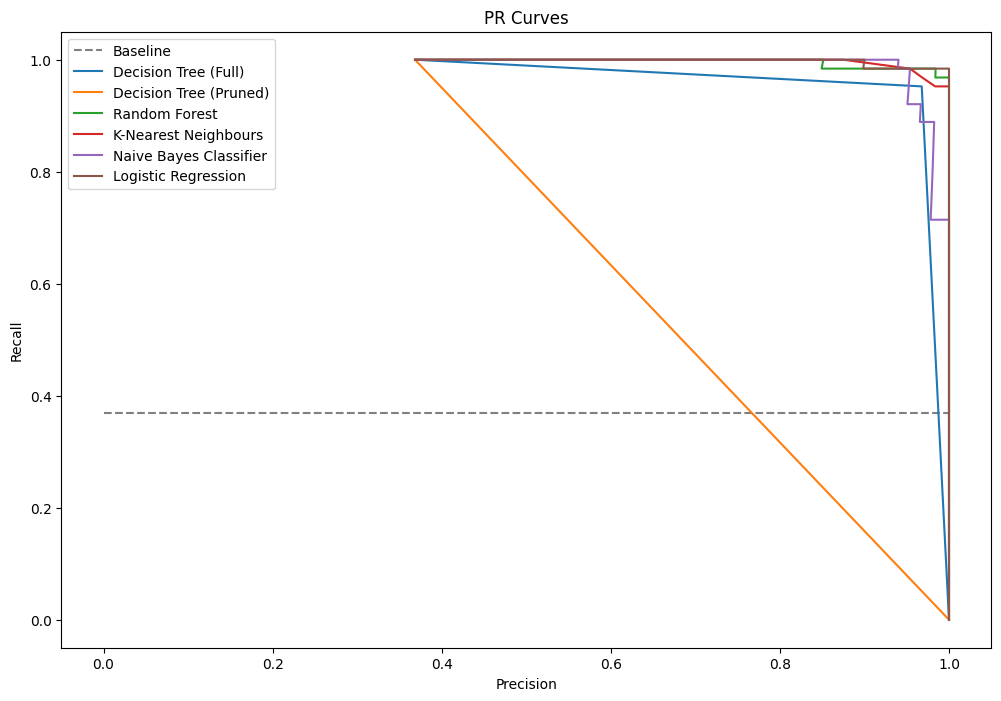

In [230]:
# An empty list for area under the ROC Curve for varied models.
auc = []

plt.figure(figsize=(12, 8))

# Baseline
baseline = sum(y_test) / len(y_test)
plt.hlines(baseline, xmin=0, xmax=1, linestyles='dashed', colors='gray', label='Baseline')
auc.append(baseline)

# extract roc curve values: Decision Tree (Full)
y_probs_FT = full_clf.predict_proba(X_test_pca)[:, 1] # Select the probabilities for the positive class
per_FT, rec_FT, thresholds_FT = precision_recall_curve(y_test_pca, y_probs_FT)
auc_FT = metrics.roc_auc_score(y_test_pca, y_probs_FT)
auc.append(auc_FT)

# extract roc curve values: Decision Tree (Pruned)
y_probs_PT = pruned_clf.predict_proba(X_test_pca)[:, 1] # Select the probabilities for the positive class
per_PT, rec_PT, thresholds_PT = precision_recall_curve(y_test_pca, y_probs_PT)
auc_PT = metrics.roc_auc_score(y_test_pca, y_probs_PT)
auc.append(auc_PT)

# extract roc curve values: Random Forest
y_probs_RF = rf.predict_proba(X_test_pca)[:, 1] # Select the probabilities for the positive class
per_RF, rec_RF, thresholds_RF = precision_recall_curve(y_test_pca, y_probs_RF)
auc_RF = metrics.roc_auc_score(y_test_pca, y_probs_RF)
auc.append(auc_RF)

# extract roc curve values: K-Nearest Neighbours
y_probs_KNN = knn_best.predict_proba(X_test_pca)[:, 1] # Select the probabilities for the positive class
per_KNN, rec_KNN, thresholds_KNN = precision_recall_curve(y_test_pca, y_probs_KNN)
auc_KNN = metrics.roc_auc_score(y_test_pca, y_probs_KNN)
auc.append(auc_KNN)

# extract roc curve values: Gaussian Naive Bayes
y_probs_GNB = gnb.predict_proba(X_test_pca)[:, 1] # Select the probabilities for the positive class
per_GNB, rec_GNB, thresholds_GNB = precision_recall_curve(y_test_pca, y_probs_GNB)
auc_GNB = metrics.roc_auc_score(y_test_pca, y_probs_GNB)
auc.append(auc_GNB)

# extract roc curve values: Logistic Regression
y_probs_LR = lr.predict_proba(X_test_pca)[:, 1] # Select the probabilities for the positive class
per_LR, rec_LR, thresholds_LR = precision_recall_curve(y_test_pca, y_probs_LR)
auc_LR = metrics.roc_auc_score(y_test_pca, y_probs_LR)
auc.append(auc_LR)

# plot roc curve
plt.plot(per_FT,rec_FT)
plt.plot(per_PT,rec_PT)
plt.plot(per_RF,rec_RF)
plt.plot(per_KNN,rec_KNN)
plt.plot(per_GNB,rec_GNB)
plt.plot(per_LR, rec_LR)

plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('PR Curves')
plt.legend(['Baseline', 'Decision Tree (Full)', 'Decision Tree (Pruned)', 'Random Forest', 'K-Nearest Neighbours', 'Naive Bayes Classifier', 'Logistic Regression'])
plt.show()

In [231]:
models = ['Baseline','Decision Tree (Full)', 'Decision Tree (Pruned)', 'Random Forest', 'K-Nearest Neighbours', 'Naive Bayes Classifier', 'Logistic Regression']
auc_df = pd.DataFrame(index = models)
auc_df["AUC"] = auc
auc_df

,AUC
Baseline,0.368421
Decision Tree (Full),0.966931
Decision Tree (Pruned),0.500000
Random Forest,0.998236
K-Nearest Neighbours,0.998530
Naive Bayes Classifier,0.995444
Logistic Regression,0.998971


## Precision-Recall Comparison

In [232]:
scores_dict

{'Full Tree': [0.9707602339181286,
  0.967741935483871,
  0.9523809523809523,
  0.96],
 'Pruned Tree': [0.631578947368421, 0.0, 0.0, 0.0],
 'Random Forest': [0.9824561403508771,
  0.96875,
  0.9841269841269841,
  0.9763779527559056],
 'K-Nearest Neighbours': [0.9766081871345029,
  0.9836065573770492,
  0.9523809523809523,
  0.967741935483871],
 'Gaussian Naive Bayes': [0.9766081871345029,
  0.9538461538461539,
  0.9841269841269841,
  0.96875],
 'Logisic Regression': [0.9941520467836257,
  0.9954128440366973,
  0.9920634920634921,
  0.9936958525345623]}

In [233]:
# turn scores dictionary into dataframe for readability
scores_df = pd.DataFrame.from_dict(scores_dict, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1'])
scores_df

,Accuracy,Precision,Recall,F1
Full Tree,0.970760,0.967742,0.952381,0.960000
Pruned Tree,0.631579,0.000000,0.000000,0.000000
Random Forest,0.982456,0.968750,0.984127,0.976378
K-Nearest Neighbours,0.976608,0.983607,0.952381,0.967742
Gaussian Naive Bayes,0.976608,0.953846,0.984127,0.968750
Logisic Regression,0.994152,0.995413,0.992063,0.993696


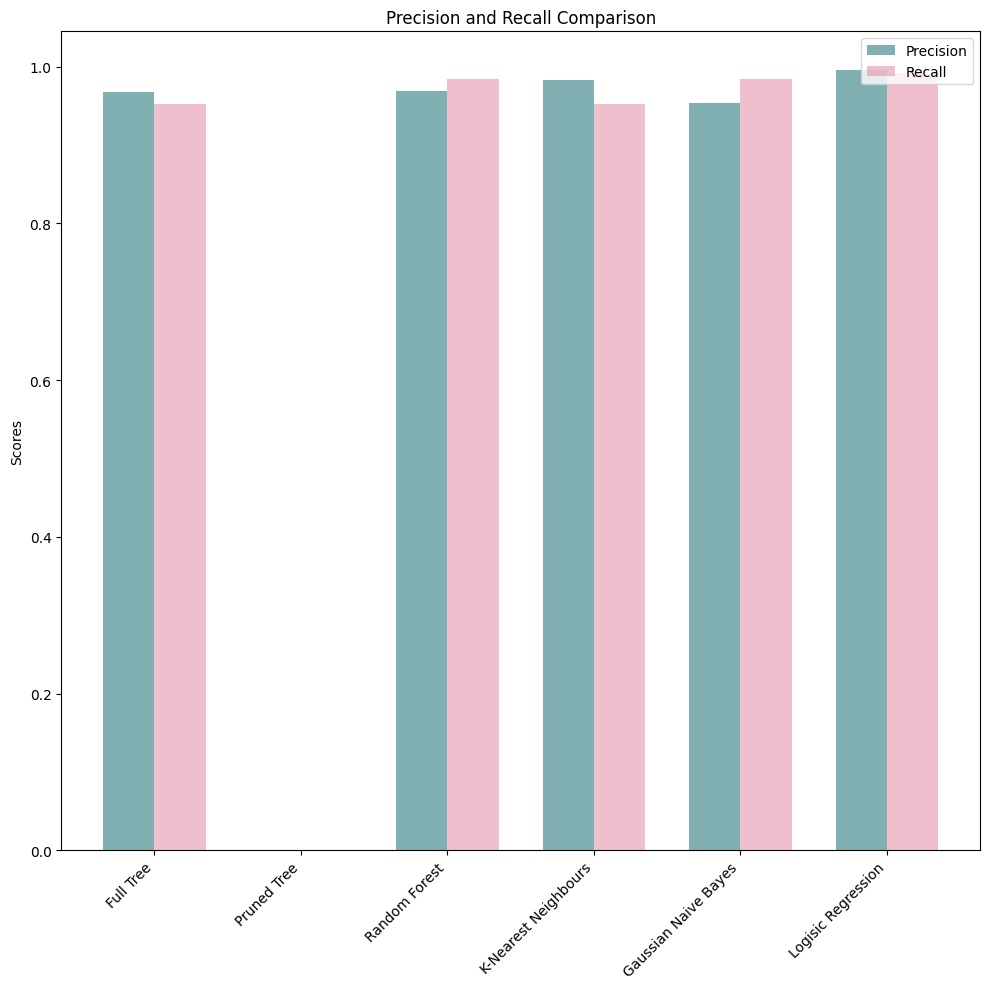

In [234]:
precision = scores_df['Precision']
recall = scores_df['Recall']

plt.figure(figsize=(10, 10))

# Use the index of scores_df (model names) as x-axis ticks
x_ticks = scores_df.index

# Create bar plots
bar_width = 0.35
x_pos_precision = np.arange(len(x_ticks))
x_pos_recall = x_pos_precision + bar_width

plt.bar(x_pos_precision, precision, width=bar_width, label='Precision', alpha=0.5,color = '#036264')
plt.bar(x_pos_recall, recall, width=bar_width, label='Recall', alpha=0.5, color = '#e0819d')

# Set x-axis ticks and labels
plt.xticks(x_pos_precision + bar_width / 2, x_ticks, rotation=45, ha='right')

plt.legend(loc='upper right')
plt.ylabel('Scores')
plt.title('Precision and Recall Comparison')
plt.tight_layout()
plt.show()